In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import matplotlib.colors as col
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import matplotlib.path as mpath
import cosima_cookbook as cc
import cmocean.cm as cmocean
import cmocean.cm as cm
from collections import OrderedDict
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [6]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/46443/status,
Dashboard: /proxy/46443/status,Workers: 4
Total threads: 8,Total memory: 200.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46003,Workers: 4
Dashboard: /proxy/46443/status,Total threads: 8
Started: Just now,Total memory: 200.00 GiB
Comm: tcp://127.0.0.1:45095,Total threads: 2
Dashboard: /proxy/43317/status,Memory: 50.00 GiB
Nanny: tcp://127.0.0.1:40011,


In [ ]:
# topography data for plotting:
ht = cc.querying.getvar(control,'ht' , master_session,n=1)
ht = ht.sel(yt_ocean=lat_slice)
ht = ht.load()
land_mask = np.squeeze(ht.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)
land_mask_masked = np.ma.masked_where((land_mask==0),land_mask)
# make land go all the way to -90S:
land_mask_lat = ht.yt_ocean.values
land_mask_lat[0] = -90

fontsize=13

In [2]:
#load gmoc in rho space
#NYFCntrlDir = '/g/data3/hh5/tmp/cosima/mom01v5/kds75_cp/'
#NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/'
NYFCntrlDir = '/g/data3/hh5/tmp/pas561/kds75_cp_ann/'
NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/'

#Ocean_File = os.path.join(NYFPertDir,'output*/ocean.nc')
#print Ocean_File
#pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
#print pert.ty_trans_rho.shape

vgrid_file ='/g/data1/v45/pas561/mom/archive/VertOverturn/kds75.uvwt.230-257.ncra.nc'
nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yt_ocean2 = nc.variables['yt_ocean'][:]
yu_ocean2 = nc.variables['yu_ocean'][:]
xt_ocean2 = nc.variables['xt_ocean'][:]
xu_ocean2 = nc.variables['xu_ocean'][:]
st_ocean2 = nc.variables['st_ocean'][:]
#dzt2 = nc.variables['dzt'][:]
#potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print potrho.shape
#print yu_ocean.shape


#fix this to a 12 month average
nc = Dataset('/g/data3/hh5/tmp/pas561/kds75_cp/dzt.9month.nc', mode='r') # file handle, open in read only mode
dzt2 = nc.variables['dzt'][:]
nc.close() # close the file
#print dzt.shape

hgrid_file ='/g/data1/v45/pas561/mom/archive/VertOverturn/mom01_unmasked_ocean_grid.nc'
# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t2 = nc.variables['geolon_t'][:]
geolat_t2 = nc.variables['geolat_t'][:]
nc.close() # close the file


In [3]:
Ocean_File = os.path.join(NYFCntrlDir,'ocean_*.nc')
print(Ocean_File)
mom01_cntrl=xr.open_mfdataset(Ocean_File).age_global
print(mom01_cntrl.shape)

Ocean_File = os.path.join(NYFPertDir,'ocean_*.nc')
print(Ocean_File)
mom01_pert=xr.open_mfdataset(Ocean_File).age_global
print(mom01_pert.shape)


/g/data3/hh5/tmp/pas561/kds75_cp_ann/ocean_*.nc


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
(29, 75, 1351, 3600)


In [4]:
print(st_ocean2.shape)
print(st_ocean2[0:46])
print(st_ocean2[46:66])
print(st_ocean2[66:75])
print(dzt2.shape)

(75,)
[5.41280765e-01 1.68073468e+00 2.93995265e+00 4.33152149e+00
 5.86935042e+00 7.56880992e+00 9.44688496e+00 1.15223444e+01
 1.38159279e+01 1.63505526e+01 1.91515408e+01 2.22468718e+01
 2.56674591e+01 2.94474571e+01 3.36245984e+01 3.82405659e+01
 4.33414022e+01 4.89779610e+01 5.52064020e+01 6.20887357e+01
 6.96934198e+01 7.80960121e+01 8.73798840e+01 9.76369969e+01
 1.08968745e+02 1.21486866e+02 1.35314420e+02 1.50586834e+02
 1.67453006e+02 1.86076460e+02 2.06636535e+02 2.29329581e+02
 2.54370129e+02 2.81991982e+02 3.12449164e+02 3.46016618e+02
 3.82990565e+02 4.23688336e+02 4.68447515e+02 5.17624173e+02
 5.71589915e+02 6.30727513e+02 6.95424821e+02 7.66066799e+02
 8.43025513e+02 9.26648199e+02]
[1017.24370768 1115.06797498 1220.30949515 1333.07609258 1453.38443981
 1581.15373743 1716.20465096 1858.26402924 2006.97519805 2161.91288246
 2322.60123414 2488.53315123 2659.18911348 2834.05406813 3012.63138121
 3194.45338659 3379.08852049 3566.14536241 3755.27409766 3946.16599027]
[4138.

In [5]:
#depth average between 1000-4000m and below 4000m, Fig 3 of Purkey et al., 2016.
#calculate linear ocean warming trends spanning 1981 to 2016

#depth integrate from 1000-4000 and 4000:

print(st_ocean2.shape)
print(st_ocean2[0:46])
print(st_ocean2[46:66])
print(st_ocean2[66:75])

print(mom01_pert.shape)
mom01_pA_0to1=np.zeros((mom01_pert.shape[0],mom01_pert.shape[2],mom01_pert.shape[3]))
mom01_pA_1to4=np.zeros((mom01_pert.shape[0],mom01_pert.shape[2],mom01_pert.shape[3]))
mom01_pA_4to6=np.zeros((mom01_pert.shape[0],mom01_pert.shape[2],mom01_pert.shape[3]))
print(mom01_pA_1to4.shape)

for t in range(mom01_pert.shape[0]):
    print(t)
    
    mom01_pA_0to1[t,:,:]=np.sum(mom01_pert[t,0:46,:,:].load()*dzt2[0,0:46,0:1351,:],axis=0)/np.sum(dzt2[0,0:46,0:1351,:],axis=0)
    mom01_pA_1to4[t,:,:]=np.sum(mom01_pert[t,46:66,:,:].load()*dzt2[0,46:66,0:1351,:],axis=0)/np.sum(dzt2[0,46:66,0:1351,:],axis=0)
    mom01_pA_4to6[t,:,:]=np.sum(mom01_pert[t,66:75,:,:].load()*dzt2[0,66:75,0:1351,:],axis=0)/np.sum(dzt2[0,66:75,0:1351,:],axis=0)
    
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/','pA_0to1.npy')
a=np.save(of,mom01_pA_0to1)
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/','pA_1to4.npy')
a=np.save(of,mom01_pA_1to4)
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/','pA_4to6.npy')
a=np.save(of,mom01_pA_4to6)


(75,)
[5.41280765e-01 1.68073468e+00 2.93995265e+00 4.33152149e+00
 5.86935042e+00 7.56880992e+00 9.44688496e+00 1.15223444e+01
 1.38159279e+01 1.63505526e+01 1.91515408e+01 2.22468718e+01
 2.56674591e+01 2.94474571e+01 3.36245984e+01 3.82405659e+01
 4.33414022e+01 4.89779610e+01 5.52064020e+01 6.20887357e+01
 6.96934198e+01 7.80960121e+01 8.73798840e+01 9.76369969e+01
 1.08968745e+02 1.21486866e+02 1.35314420e+02 1.50586834e+02
 1.67453006e+02 1.86076460e+02 2.06636535e+02 2.29329581e+02
 2.54370129e+02 2.81991982e+02 3.12449164e+02 3.46016618e+02
 3.82990565e+02 4.23688336e+02 4.68447515e+02 5.17624173e+02
 5.71589915e+02 6.30727513e+02 6.95424821e+02 7.66066799e+02
 8.43025513e+02 9.26648199e+02]
[1017.24370768 1115.06797498 1220.30949515 1333.07609258 1453.38443981
 1581.15373743 1716.20465096 1858.26402924 2006.97519805 2161.91288246
 2322.60123414 2488.53315123 2659.18911348 2834.05406813 3012.63138121
 3194.45338659 3379.08852049 3566.14536241 3755.27409766 3946.16599027]
[4138.

In [6]:
#depth average between 1000-4000m and below 4000m, Fig 3 of Purkey et al., 2016.
#calculate linear ocean warming trends spanning 1981 to 2016

#depth integrate from 1000-4000 and 4000:

print(st_ocean2.shape)
print(st_ocean2[0:46])
print(st_ocean2[46:66])
print(st_ocean2[66:75])

print(mom01_cntrl.shape)
mom01_cA_0to1=np.zeros((mom01_cntrl.shape[0],mom01_cntrl.shape[2],mom01_cntrl.shape[3]))
mom01_cA_1to4=np.zeros((mom01_cntrl.shape[0],mom01_cntrl.shape[2],mom01_cntrl.shape[3]))
mom01_cA_4to6=np.zeros((mom01_cntrl.shape[0],mom01_cntrl.shape[2],mom01_cntrl.shape[3]))
print(mom01_cA_1to4.shape)

for t in range(mom01_cntrl.shape[0]):
    print(t)
    
    mom01_cA_0to1[t,:,:]=np.sum(mom01_cntrl[t,0:46,:,:].load()*dzt2[0,0:46,0:1351,:],axis=0)/np.sum(dzt2[0,0:46,0:1351,:],axis=0)
    mom01_cA_1to4[t,:,:]=np.sum(mom01_cntrl[t,46:66,:,:].load()*dzt2[0,46:66,0:1351,:],axis=0)/np.sum(dzt2[0,46:66,0:1351,:],axis=0)
    mom01_cA_4to6[t,:,:]=np.sum(mom01_cntrl[t,66:75,:,:].load()*dzt2[0,66:75,0:1351,:],axis=0)/np.sum(dzt2[0,66:75,0:1351,:],axis=0)
    
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_cp/','cA_0to1.npy')
a=np.save(of,mom01_cA_0to1)
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_cp/','cA_1to4.npy')
a=np.save(of,mom01_cA_1to4)
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_cp/','cA_4to6.npy')
a=np.save(of,mom01_cA_4to6)


(75,)
[5.41280765e-01 1.68073468e+00 2.93995265e+00 4.33152149e+00
 5.86935042e+00 7.56880992e+00 9.44688496e+00 1.15223444e+01
 1.38159279e+01 1.63505526e+01 1.91515408e+01 2.22468718e+01
 2.56674591e+01 2.94474571e+01 3.36245984e+01 3.82405659e+01
 4.33414022e+01 4.89779610e+01 5.52064020e+01 6.20887357e+01
 6.96934198e+01 7.80960121e+01 8.73798840e+01 9.76369969e+01
 1.08968745e+02 1.21486866e+02 1.35314420e+02 1.50586834e+02
 1.67453006e+02 1.86076460e+02 2.06636535e+02 2.29329581e+02
 2.54370129e+02 2.81991982e+02 3.12449164e+02 3.46016618e+02
 3.82990565e+02 4.23688336e+02 4.68447515e+02 5.17624173e+02
 5.71589915e+02 6.30727513e+02 6.95424821e+02 7.66066799e+02
 8.43025513e+02 9.26648199e+02]
[1017.24370768 1115.06797498 1220.30949515 1333.07609258 1453.38443981
 1581.15373743 1716.20465096 1858.26402924 2006.97519805 2161.91288246
 2322.60123414 2488.53315123 2659.18911348 2834.05406813 3012.63138121
 3194.45338659 3379.08852049 3566.14536241 3755.27409766 3946.16599027]
[4138.

In [9]:
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_cp/','cA_0to1.npy')
mom01_cA_0to1=np.load(of)

of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_cp/','cA_1to4.npy')
mom01_cA_1to4=np.load(of)

of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_cp/','cA_4to6.npy')
mom01_cA_4to6=np.load(of)  

print(mom01_cA_1to4.shape)
print(mom01_cA_4to6.shape)

of=os.path.join(NYFPertDir,'pA_0to1.npy')
mom01_pA_0to1=np.load(of)

of=os.path.join(NYFPertDir,'pA_1to4.npy')
mom01_pA_1to4=np.load(of)

of=os.path.join(NYFPertDir,'pA_4to6.npy')
mom01_pA_4to6=np.load(of)  

print(mom01_pA_1to4.shape)
print(mom01_pA_4to6.shape)


(29, 1351, 3600)
(29, 1351, 3600)
(29, 1351, 3600)
(29, 1351, 3600)


In [13]:
#cyrs=np.arange(1970,2017,1)
pyrs=np.arange(1973,1973+29,1)

#calc linear trend in C/s since 1981-2000 (8 years from 1973) 
print(pyrs)
print(pyrs[8:28])
#print(pyrs[28:44])
pyrs.shape

[1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001]
[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000]


(29,)

In [15]:
#calc dA/dt
#cyrs=np.arange(1970,2017,1)
pyrs=np.arange(1973,1973+29,1)

#calc linear trend in C/s since 1981-2000 (8 years from 1973) 
#print cyrs[11:31]
print(pyrs[8:28])


mom01_tr81to00_pA_0to1=np.zeros((mom01_cntrl.shape[2],mom01_cntrl.shape[3]))
mom01_tr81to00_cA_0to1=np.zeros((mom01_cntrl.shape[2],mom01_cntrl.shape[3]))
mom01_tr81to00_pA_1to4=np.zeros((mom01_cntrl.shape[2],mom01_cntrl.shape[3]))
mom01_tr81to00_cA_1to4=np.zeros((mom01_cntrl.shape[2],mom01_cntrl.shape[3]))
mom01_tr81to00_pA_4to6=np.zeros((mom01_cntrl.shape[2],mom01_cntrl.shape[3]))
mom01_tr81to00_cA_4to6=np.zeros((mom01_cntrl.shape[2],mom01_cntrl.shape[3]))


for j in range(0,mom01_cntrl.shape[2]):
    #print j
    
    mom01_tr81to00_pA_0to1[j,:]=np.polyfit(range(20), mom01_pA_0to1[8:28,j,:],1)[0,:]
    mom01_tr81to00_cA_0to1[j,:]=np.polyfit(range(20), mom01_cA_0to1[8:28,j,:],1)[0,:]
     
    mom01_tr81to00_pA_1to4[j,:]=np.polyfit(range(20), mom01_pA_1to4[8:28,j,:],1)[0,:]
    mom01_tr81to00_cA_1to4[j,:]=np.polyfit(range(20), mom01_cA_1to4[8:28,j,:],1)[0,:]
    
    mom01_tr81to00_pA_4to6[j,:]=np.polyfit(range(20), mom01_pA_4to6[8:28,j,:],1)[0,:]
    mom01_tr81to00_cA_4to6[j,:]=np.polyfit(range(20), mom01_cA_4to6[8:28,j,:],1)[0,:]    
    

[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000]


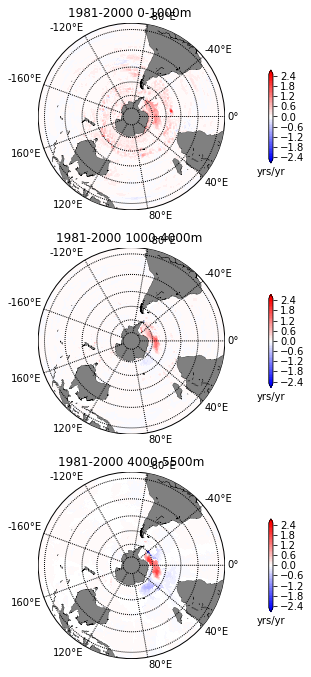

In [21]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('(1991-2000)-(1981-1990) Decadal Temp Anom')

clev = np.arange(-2.5,2.6,.1)

plt.subplot(3,1,1)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pA_0to1-mom01_tr81to00_cA_0to1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('yrs/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 0-1000m ')


plt.subplot(3,1,2)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pA_1to4-mom01_tr81to00_cA_1to4, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('yrs/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')


plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pA_4to6-mom01_tr81to00_cA_4to6,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('yrs/yr')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 4000-5500m')


plt.tight_layout()